In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


CO2_data = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
DF = CO2_data[1]
DF.columns = ["Country", "CO2MT_1990", "CO2MT_2005","CO2MT_2017", "%_World", "Change_2017_1990", "Per_land_area","Per_ Capita", "Incl_LUCF","Excl_LUCF"]
DF = DF[ DF["Country"].str.contains ("World|European Union")== False]


DF['CO2MT_1990_tov_1990']= DF.loc[:,"CO2MT_1990"]/DF.loc[:,"CO2MT_1990"]*100 
DF['CO2MT_2005_tov_1990']= DF.loc[:,"CO2MT_2005"]/DF.loc[:,"CO2MT_1990"]*100 
DF['CO2MT_2017_tov_1990']= DF.loc[:,"CO2MT_2017"]/DF.loc[:,"CO2MT_1990"]*100
DF.sort_values(by = ["CO2MT_2017_tov_1990"], inplace = True, ascending = False)
large = DF[DF["CO2MT_1990"] >5]
pd.concat ([large ["CO2MT_2005_tov_1990"].head(3), large ["CO2MT_2005_tov_1990"].tail(3), large ["CO2MT_2017_tov_1990"].head(3), large ["CO2MT_2017_tov_1990"].tail(3)])
large
top3 = DF.head(3)
bot3 = DF.tail(3)
CO2_best_worse = top3.append (bot3)
CO2_best_worse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Country,CO2MT_1990,CO2MT_2005,CO2MT_2017,%_World,Change_2017_1990,Per_land_area,Per_ Capita,Incl_LUCF,Excl_LUCF,CO2MT_1990_tov_1990,CO2MT_2005_tov_1990,CO2MT_2017_tov_1990
81,Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,100.0,21033.333333,17266.666667
34,Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,40.16,11.16,100.0,659.950860,2594.594595
62,Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,100.0,3475.257732,2545.360825
199,Ukraine,783.210,354.429,205.723,0.55%,-73.7%,341.0,4.7,173.18,185.37,100.0,45.253380,26.266646
128,Moldova,31.957,8.139,8.263,0.02%,-74.1%,244.0,2.0,8.70,8.59,100.0,25.468598,25.856620
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,100.0,21.943089,23.344123


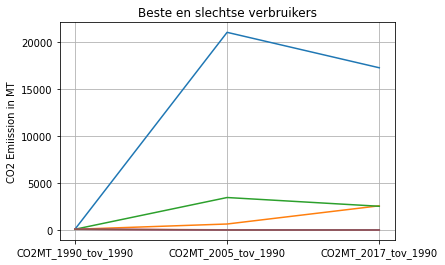

In [ ]:
fig, ax = plt.subplots()

years = CO2_best_worse.columns[10:]

for index, row in CO2_best_worse.iterrows():
  plt.plot(years,row[10:], label = row[0])

plt.title ("Beste en slechtse verbruikers")
#plt.xlabel ("1990", "2005" ,"2017")
plt.ylabel ("CO2 Emiission in MT")
plt.grid()
plt.show()
ax.legend()